In [2]:
import tensorflow as tf

## Core ML models in Tensorflow

These include:
- Linear regression
- Classifications
- Clustering
- Hidden Markov Models

## Linear Regression

- Linear model of data points, y=mx+c generally, but can fit higher order
- Use to make predictions for new data, ie. for some x datapoint, predict what y will be
- can be used in higher dimensions too

In [3]:
from __future__ import absolute_import,division,print_function,unicode_literals
import numpy as np
import pandas as pd
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import sklearn as sk

Using Kaggle dataset found here: https://www.kaggle.com/datasets/lovishbansal123/nasa-asteroids-classification

In [26]:
sp_df = pd.read_csv("C:\\Users\\sinea\\Documents\\Python projects\\TensorFlow\\nasa.csv")

In [5]:
sp_df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [6]:
sp_df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [7]:
sp_df.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


In [8]:
#remove columns with dates in

sp_df = sp_df.select_dtypes(exclude=['object'])
sp_df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,False


In [9]:
sp_df.shape

(4687, 36)

<Axes: >

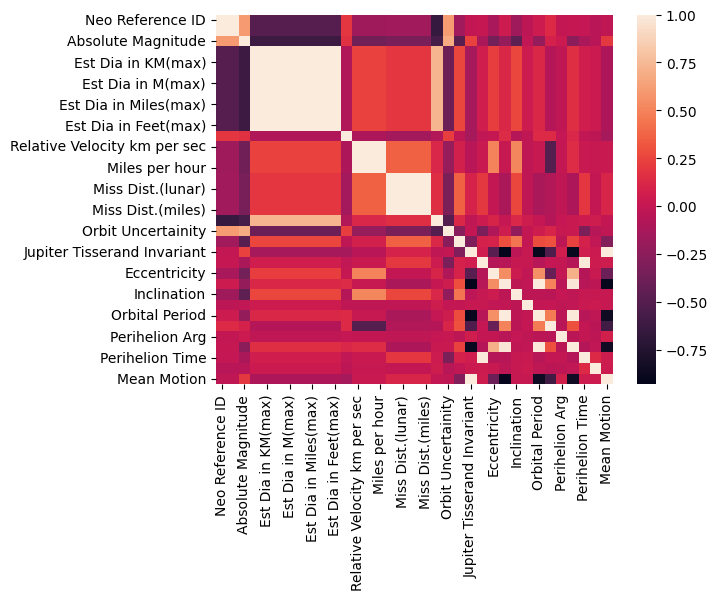

In [10]:
import seaborn as sns

sns.heatmap(sp_df.loc[:, sp_df.columns != 'Hazardous'].corr())

In [27]:
sp_df = sp_df[['Absolute Magnitude','Est Dia in KM(min)',
 'Est Dia in KM(max)','Epoch Date Close Approach','Relative Velocity km per sec',
 'Relative Velocity km per hr','Miles per hour',
 'Miss Dist.(Astronomical)','Orbit Uncertainity','Minimum Orbit Intersection',
 'Jupiter Tisserand Invariant','Epoch Osculation','Eccentricity','Semi Major Axis','Inclination','Asc Node Longitude','Orbital Period',
 'Perihelion Distance','Perihelion Arg','Aphelion Dist','Perihelion Time','Mean Anomaly','Mean Motion', 'Hazardous']]

In [38]:
from sklearn.model_selection import train_test_split

X = sp_df.loc[:, sp_df.columns != 'Hazardous']
y = sp_df['Hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:
#convert the hazardous column into boolean

y = y.astype(int)

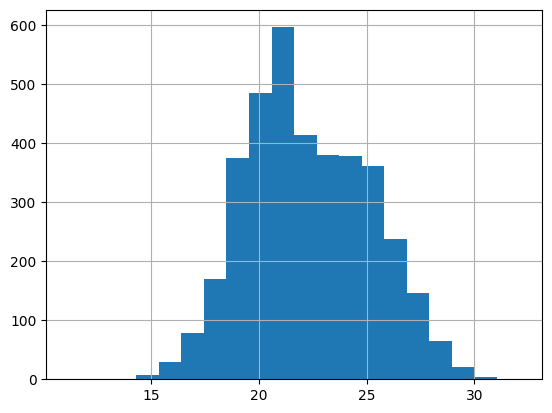

In [53]:
a = X_train['Absolute Magnitude']

a.hist(bins=20);

#Graph looks nearly normal?

<Axes: ylabel='Hazardous'>

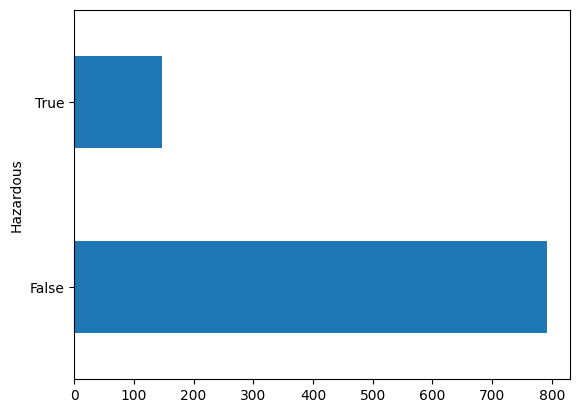

In [56]:
y_test.value_counts().plot(kind='barh')

#imbalanced classes

If you get categorical values in a column, tensorflow has a function called 'categorical_column_with_vocabulary_list'

Which will create a feature column for us

Useful video for this: https://www.freecodecamp.org/learn/machine-learning-with-python/tensorflow/core-learning-algorithms-training-and-testing-data

In [39]:
categorical_column = ['Hazardous']

numeric_columns = ['Absolute Magnitude','Est Dia in KM(min)',
 'Est Dia in KM(max)','Epoch Date Close Approach','Relative Velocity km per sec',
 'Relative Velocity km per hr','Miles per hour',
 'Miss Dist.(Astronomical)','Orbit Uncertainity','Minimum Orbit Intersection',
 'Jupiter Tisserand Invariant','Epoch Osculation','Eccentricity','Semi Major Axis','Inclination','Asc Node Longitude','Orbital Period',
 'Perihelion Distance','Perihelion Arg','Aphelion Dist','Perihelion Time','Mean Anomaly','Mean Motion']

feature_columns = []

for feature_name in numeric_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

### The training process

- Load in *batches* helps when there are large amounts of data than can't be loaded in RAM

- *Epochs* = how many times will the model see the same data i.e. 10 epochs means the model will see the same dataset 10 times and can possibly pick up patterns it did not previously see

- If epoch too high, overfitting can occur

#### Input function

- defines how the dataset will be converted into batches at each epoch
- Necessary step

In [32]:
#From tf website

def make_input_func(data_df, label_df, num_epochs = 10, shuffle = True, batch_size = 32):
    
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) #tf.data.Dataset object is needed for the model
        if shuffle:
            ds = ds.shuffle(1000)  #randomise order of data
        ds = ds.batch(batch_size).repeat(num_epochs)  #split data into batches of 32, and repeat process for the number of epochs
        return ds  #returns a batch of the dataset
    return input_function

In [40]:
train_input_func = make_input_func(X_train, y_train)
eval_input_func = make_input_func(X_test, y_test, num_epochs=1, shuffle=False)

#### Creating the model

- Create a linear estimator to use the linear regression algorithm for classification

In [41]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sinea\\AppData\\Local\\Temp\\tmp1z5qwrdz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [42]:
linear_est.train(train_input_func)
result = linear_est.evaluate(eval_input_func)

clear_output()
print(result['accuracy'])

0.8432836
